<a href="https://colab.research.google.com/github/rajagopalmotivate/DeepLearningforSocietal/blob/main/Copy_of_Copy_of_Add_removes_Feature_from_different_Fruits_VAE_Generator_Good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
%tensorflow_version 1.x


TensorFlow 1.x selected.


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 71 bytes


In [3]:
!ls

kaggle.json  sample_data


In [2]:
!wget https://raw.githubusercontent.com/rajagopalmotivate/DeepLearningforSocietal/main/kaggle.json

--2021-12-16 15:37:37--  https://raw.githubusercontent.com/rajagopalmotivate/DeepLearningforSocietal/main/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      71  --.-KB/s    in 0s      

2021-12-16 15:37:37 (3.25 MB/s) - ‘kaggle.json’ saved [71/71]



In [5]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download "moltean/fruits"


 43% 570M/1.28G [00:12<00:12, 61.9MB/s]

In [ ]:
import os
import zipfile

if True:
    zip_ref = zipfile.ZipFile('fruits.zip', 'r')
    zip_ref.extractall()
    zip_ref.close()

In [ ]:
!ls fruits-360_dataset/fruits-360/Training/

'Apple Braeburn'       'Grape Blue'	     'Pear Monster'
'Apple Crimson Snow'   'Grapefruit Pink'     'Pear Red'
'Apple Golden 1'       'Grapefruit White'    'Pear Stone'
'Apple Golden 2'       'Grape Pink'	     'Pear Williams'
'Apple Golden 3'       'Grape White'	      Pepino
'Apple Granny Smith'   'Grape White 2'	     'Pepper Green'
'Apple Pink Lady'      'Grape White 3'	     'Pepper Orange'
'Apple Red 1'	       'Grape White 4'	     'Pepper Red'
'Apple Red 2'	        Guava		     'Pepper Yellow'
'Apple Red 3'	        Hazelnut	      Physalis
'Apple Red Delicious'   Huckleberry	     'Physalis with Husk'
'Apple Red Yellow 1'    Kaki		      Pineapple
'Apple Red Yellow 2'    Kiwi		     'Pineapple Mini'
 Apricot	        Kohlrabi	     'Pitahaya Red'
 Avocado	        Kumquats	      Plum
'Avocado ripe'	        Lemon		     'Plum 2'
 Banana		       'Lemon Meyer'	     'Plum 3'
'Banana Lady Finger'    Limes		      Pomegranate
'Banana Red'	        Lychee		     'Pomelo Sweetie'
 Beetroot	        Mand

In [ ]:
! mv fruits-360_dataset/fruits-360 fruits-360

In [ ]:
epilison = 0

#epilison = 1



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import pickle
import numpy as np
from PIL import Image
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


In [ ]:
from keras import applications
from keras import backend as K
from keras import optimizers
from keras.callbacks import ModelCheckpoint, History
from keras.layers import Dense, Input, UpSampling2D, Conv2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator


## location of data

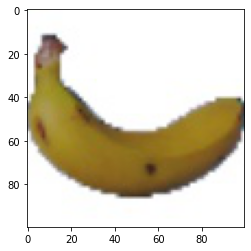

In [ ]:
img = plt.imread('fruits-360/Training/Banana/66_100.jpg')
plt.imshow(img)

In [ ]:
img_width, img_height = 64, 64
train_data_dir = "fruits-360/Training"
validation_data_dir = "fruits-360/Test"
batch_size = 64
nb_epoch = 1
nb_channels= 3

## Config

In [ ]:
def fixed_generator(generator):
    for batch in generator:
        yield (batch, batch)

## Data loaders

In [ ]:
train_datagen_cnn = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen_cnn = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator_cnn = train_datagen_cnn.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None, shuffle=True)

Found 67692 images belonging to 131 classes.


In [ ]:
validation_generator_cnn = test_datagen_cnn.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None, shuffle=True)

Found 22688 images belonging to 131 classes.


## models

In [ ]:
def AE_CNN():
    input_img = Input(shape=(img_width, img_height, 3))
    
    # Encoding network
    x = Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(input_img)
    x = Conv2D(32, (3, 3), activation='relu', padding='same', strides=2)(x)
    encoded = Conv2D(32, (2, 2), activation='relu', padding="same", strides=2)(x)

    # Decoding network
    x = Conv2D(32, (2, 2), activation='relu', padding="same")(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    return Model(input_img, decoded)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.layers import Dense, Input
from keras.layers import Conv2D, Flatten, Lambda
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras.datasets import mnist, fashion_mnist, cifar10
from keras.losses import mse, binary_crossentropy
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import copy
from keras.utils import plot_model
from google.colab import files


In [ ]:
#@title



# reparameterization trick
# instead of sampling from Q(z|X), sample eps = N(0,I)
# then z = z_mean + sqrt(var)*eps
def sampling(args):
    """Reparameterization trick by sampling fr an isotropic unit Gaussian.
    # Arguments:
        args (tensor): mean and log of variance of Q(z|X)
    # Returns:
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon =  K.random_normal(shape=(batch, dim))
    #epsilon = 0 
    return z_mean + K.exp(0.5 * z_log_var) * epsilon





image_size = img_width

In [ ]:
# network parameters
input_shape = (image_size, image_size, 3)
kernel_size = 5
filters = 16
latent_dim_colums = 40
latent_dim = 80 * latent_dim_colums
epochs = 10

# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
for i in range(3):
    filters *= 2
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               strides=2,
               padding='same')(x)

# shape info needed to build decoder model
shape = K.int_shape(x)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
#@title
# generate latent vector Q(z|X)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)



In [ ]:
#@title
# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])



Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   2432        encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 16, 16, 64)   51264       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 8, 8, 128)    204928      conv2d_2[0][0]                   
____________________________________________________________________________________________

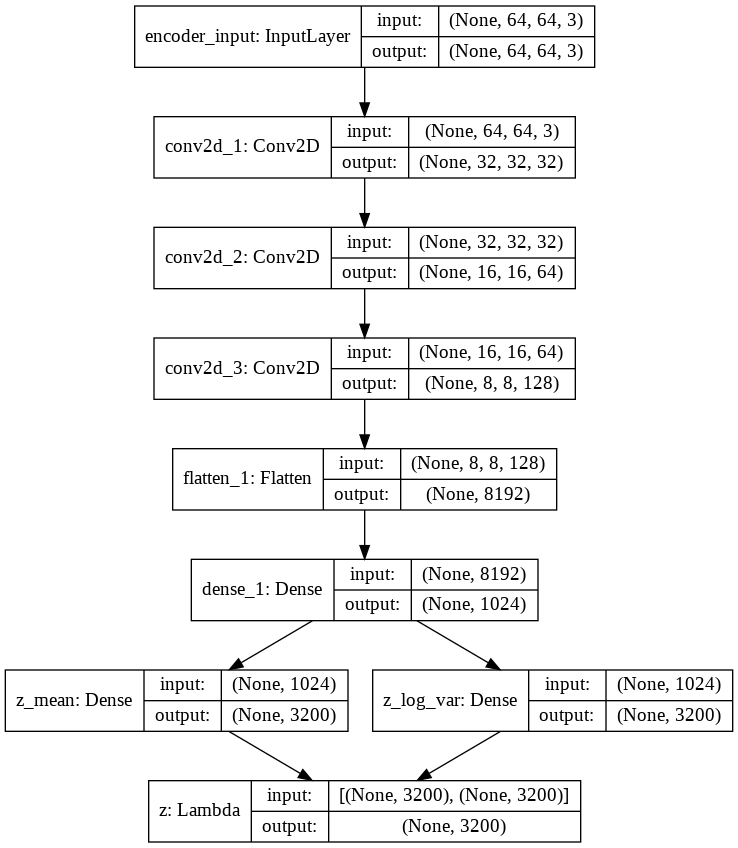

In [ ]:
#@title
# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
plot_model(encoder, to_file='vae_cnn_encoder.png', show_shapes=True)

In [ ]:
files.download('vae_cnn_encoder.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title
# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(shape[1] * shape[2] * shape[3], activation='relu')(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

for i in range(3):
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        activation='relu',
                        strides=2,
                        padding='same')(x)
    filters //= 2

outputs = Conv2DTranspose(filters=3,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='vae_cnn_decoder.png', show_shapes=True)


decoderVisvalizer = Model(latent_inputs, x, name='decoderVisuvalizer')
#plot_model(decoderVisvalizer, to_file='decoderVisuvalizer.png', show_shapes=True)




Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 8192)              26222592  
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 128)       409728    
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 32, 32, 64)        204864    
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 64, 64, 32)        51232     
_________________________________________________________________
decoder_output (Conv2DTransp (None, 64, 64, 3)         2403

In [ ]:
#@title
# instantiate VAE model
outputs = decoder( encoder(inputs)[2] )
vae = Model(inputs, outputs, name='vae')



In [ ]:
#@title

#models = (encoder, decoder)
#data = (x_test, y_test)

def mylosscustomNandri(inputs, outputs):

  typeoflossfun = False 
      # VAE loss = mse_loss or xent_loss + kl_loss
  if typeoflossfun:
          reconstruction_loss = mse(K.flatten(inputs), K.flatten(outputs))
  else:
          reconstruction_loss = binary_crossentropy(K.flatten(inputs),
                                                    K.flatten(outputs))

  print(reconstruction_loss.shape)

  reconstruction_loss *= image_size * image_size
  print(reconstruction_loss.shape)
  kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)

  print(kl_loss.shape)

  kl_loss = K.sum(kl_loss, axis=-1)
  print(kl_loss.shape)

  kl_loss *= -0.5

  kl_loss = kl_loss * epilison

  vae_loss = K.mean(reconstruction_loss + kl_loss)


  print(vae_loss.shape)

  return vae_loss





In [ ]:
#vae.add_loss(vae_loss)


In [ ]:
#vae.compile(optimizer='rmsprop')

#vae.summary()

#plot_model(vae, to_file='vae_cnn.png', show_shapes=True) 

In [ ]:
autoencoder_cnn = vae

In [ ]:

#autoencoder_cnn = AE_CNN()
autoencoder_cnn.compile(optimizer='adadelta', loss=mylosscustomNandri)

()
()
(?, 3200)
(?,)
()


In [ ]:
autoencoder_cnn.fit_generator(
    fixed_generator(train_generator_cnn),
    samples_per_epoch=math.floor(41322  / batch_size),
    nb_epoch=1,

        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=645, epochs=1)`
  after removing the cwd from sys.path.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1
645/645 [==============================] - 116s 181ms/step - loss: 1932.1693


In [ ]:
autoencoder_cnn.fit_generator(
    fixed_generator(train_generator_cnn),
    samples_per_epoch=math.floor(41322  / batch_size),
    nb_epoch=nb_epoch,
    validation_data=fixed_generator(validation_generator_cnn),
    nb_val_samples=math.floor(13877  / batch_size),
    verbose=1
        )

Epoch 1/1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., validation_data=<generator..., verbose=1, steps_per_epoch=645, epochs=1, validation_steps=216)`
  import sys


645/645 [==============================] - 122s 188ms/step - loss: 1582.4227 - val_loss: 1566.9224


In [ ]:
x_test = validation_generator_cnn.next()


In [ ]:
decoded_imgs = autoencoder_cnn.predict(x_test)


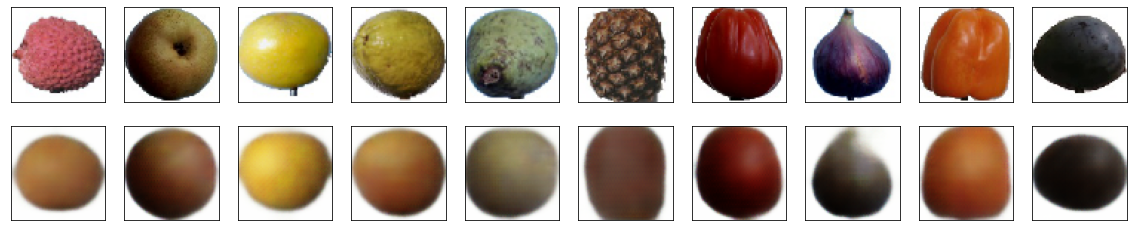

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
digit_size = image_size

In [ ]:
x_test = validation_generator_cnn.next()


In [ ]:
x_test.shape

(64, 64, 64, 3)

In [ ]:
x_test[0].shape

(64, 64, 3)

In [ ]:

whatisthis = encoder.predict(x_test[0:1])

thislatentvector1 = whatisthis[2]


In [ ]:
whatisthis = encoder.predict(x_test[2:3])

thislatentvector2 = whatisthis[2]

In [ ]:
whatisthis = encoder.predict(x_test[4:5])

thislatentvector3 = whatisthis[2]

In [ ]:
nandJ = thislatentvector1 - thislatentvector2 + thislatentvector3

      A   -   B   +   C   =  D       


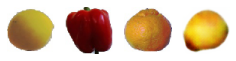

    0  -  2  +  4 =    ?    


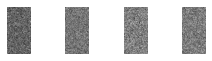

A-B = E       


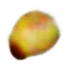

In [ ]:

print('      A   -   B   +   C   =  D       ')
plt.figure(figsize=(4, 4))
plt.subplot(4 , 4 , 1)
plt.axis('off')
plt.imshow(x_test[0].reshape(digit_size, digit_size , 3 ))

plt.subplot(4 , 4 , 2)
plt.axis('off')
plt.imshow(x_test[2].reshape(digit_size, digit_size, 3))

plt.subplot(4 , 4 , 3)
plt.axis('off')
plt.imshow(x_test[4].reshape(digit_size, digit_size, 3))


x_decoded = decoder.predict( [nandJ] )
digit = x_decoded[0].reshape(digit_size, digit_size, 3)

plt.subplot(4 , 4 , 4)
plt.axis('off')
plt.imshow(digit)
plt.show()


print('    ' + str(0) + '  -  ' + str(2) + '  +  ' + str(4)  + ' =    ?    ')
 

  
  
plt.figure(figsize=(4, 4))
plt.subplot(4 , 4 , 1)
plt.axis('off')
plt.imshow(thislatentvector1.reshape(80, latent_dim_colums))

plt.subplot(4 , 4 , 2)
plt.axis('off')
plt.imshow(thislatentvector2.reshape(80, latent_dim_colums))


plt.subplot(4 , 4 , 3)
plt.axis('off')
plt.imshow(thislatentvector3.reshape(80, latent_dim_colums))


plt.subplot(4 , 4 , 4)
plt.axis('off')
plt.imshow(nandJ.reshape(80, latent_dim_colums))



plt.show()

x_decoded = decoder.predict( [thislatentvector1 - thislatentvector2] )
digit = x_decoded[0].reshape(digit_size, digit_size , 3)

print('A-B = E       ')

plt.figure(figsize=(4, 1))
plt.axis('off')
plt.imshow(digit)
plt.show()


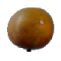

In [ ]:

x_test = validation_generator_cnn.next()


plt.figure(figsize=(4, 4))
plt.subplot(4 , 4 , 1)
plt.axis('off')
plt.imshow(x_test[0].reshape(digit_size, digit_size , 3 ))

whatisthis = encoder.predict(x_test[0:1])

thislatentvector1 = whatisthis[2]


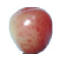

In [ ]:
x_test = validation_generator_cnn.next()

aimage = x_test[0]

plt.figure(figsize=(4, 4))
plt.subplot(4 , 4 , 1)
plt.axis('off')
plt.imshow(x_test[0].reshape(digit_size, digit_size , 3 ))

whatisthis = encoder.predict(x_test[0:1])

thislatentvector2 = whatisthis[2]

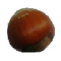

In [ ]:
x_test = validation_generator_cnn.next()


plt.figure(figsize=(4, 4))
plt.subplot(4 , 4 , 1)
plt.axis('off')
plt.imshow(x_test[0].reshape(digit_size, digit_size , 3 ))

whatisthis = encoder.predict(x_test[0:1])

thislatentvector3 = whatisthis[2]

In [ ]:
x_test = validation_generator_cnn.next()

#for aimage in x_test:
  #print(aimage.shape)

<Figure size 432x288 with 0 Axes>

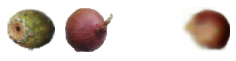

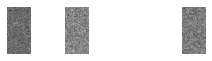

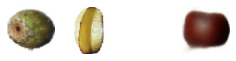

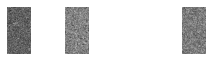

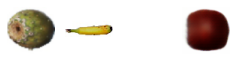

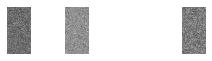

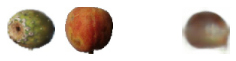

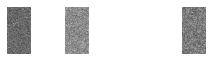

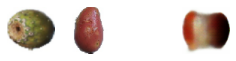

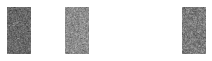

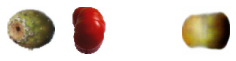

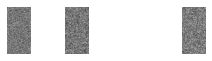

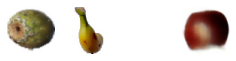

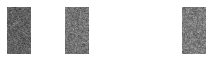

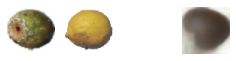

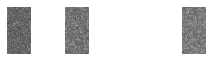

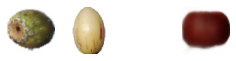

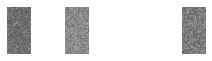

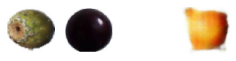

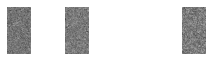

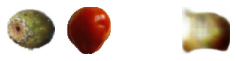

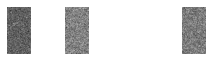

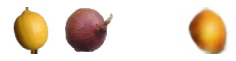

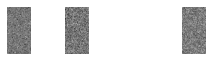

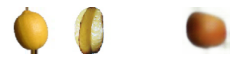

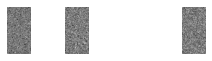

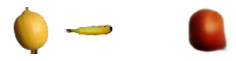

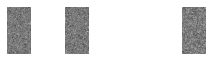

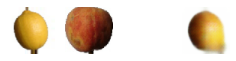

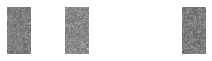

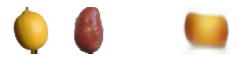

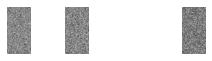

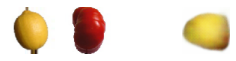

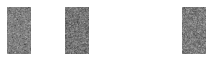

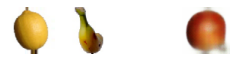

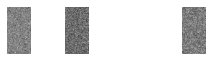

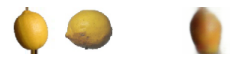

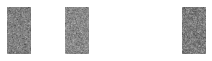

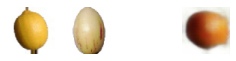

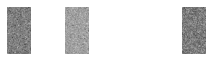

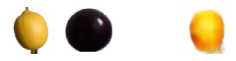

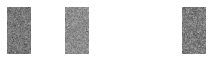

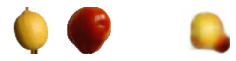

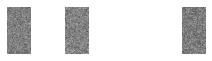

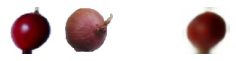

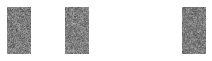

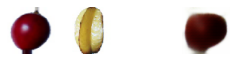

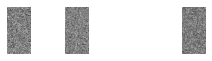

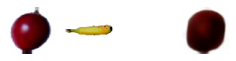

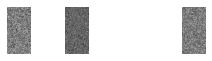

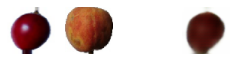

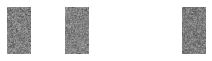

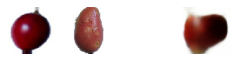

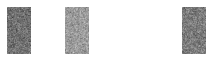

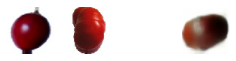

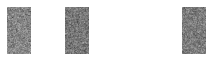

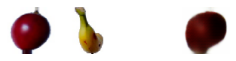

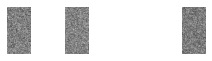

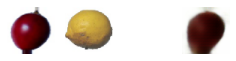

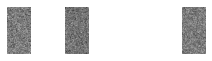

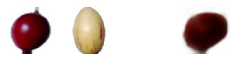

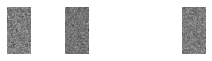

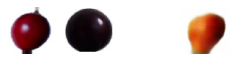

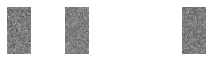

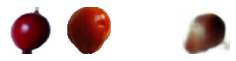

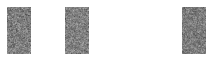

In [ ]:
plt.clf()

x_test2 = train_generator_cnn.next()

x_test3 = validation_generator_cnn.next()

counting = 0

j = 0
for bimage in x_test2:
  
  j = j + 1
  i = 0
  for cimage in x_test3:

    i = i + 1


    plt.figure(figsize=(4, 4))
    plt.subplot(4 , 4 , 1)
    plt.axis('off')
    plt.imshow(x_test2[j])

    plt.subplot(4 , 4 , 2)
    plt.axis('off')
    plt.imshow(x_test3[i])


    thislatentvector1 = encoder.predict(x_test[0:1])[2]
    thislatentvector2 = encoder.predict(x_test2[j:j+1])[2]
    thislatentvector3 = encoder.predict(x_test3[i:i+1])[2]



    x_decoded = decoder.predict( [thislatentvector2 - thislatentvector3 ] )
    digit = x_decoded[0].reshape(image_size, image_size, 3)

    plt.subplot(4 , 4 , 4)
    plt.axis('off')
    plt.imshow(digit)
    plt.show()


   # print('    ' + str(imagenumber1) + '  -  ' + str(imagenumber2)  + ' =    ?    ')




    plt.figure(figsize=(4, 4))
    plt.subplot(4 , 4 , 1)
    plt.axis('off')
    plt.imshow(thislatentvector2.reshape(80, latent_dim_colums))

    plt.subplot(4 , 4 , 2)
    plt.axis('off')
    plt.imshow(thislatentvector3.reshape(80, latent_dim_colums))



    plt.subplot(4 , 4 , 4)
    plt.axis('off')
    plt.imshow(nandJ.reshape(80, latent_dim_colums))


    plt.show()
    
    if i > 10: 
      break
  if j > 2:
    break



     A     -    B     +   C     = ?


<Figure size 432x288 with 0 Axes>

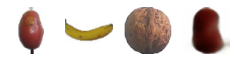

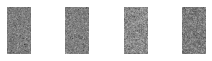

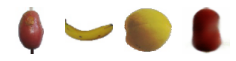

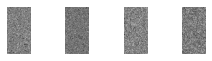

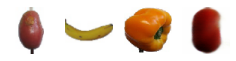

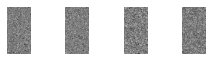

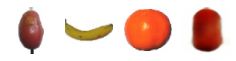

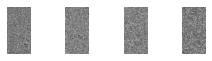

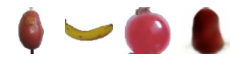

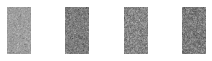

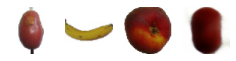

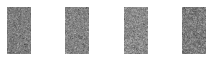

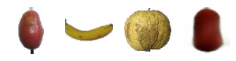

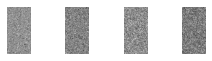

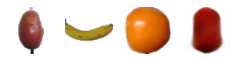

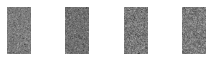

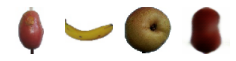

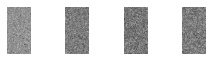

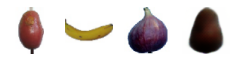

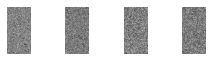

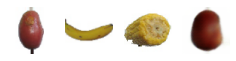

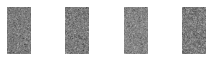

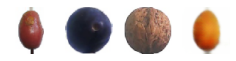

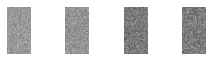

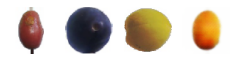

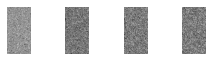

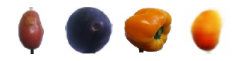

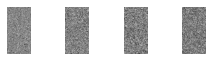

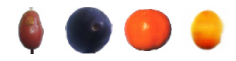

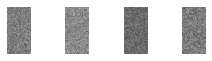

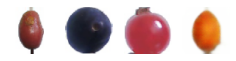

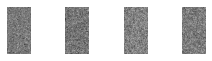

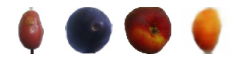

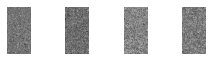

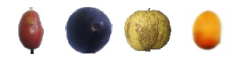

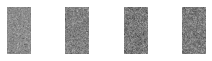

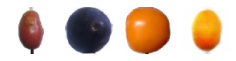

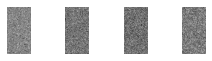

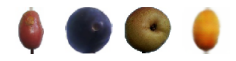

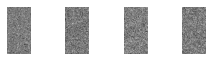

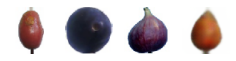

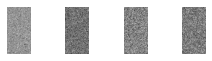

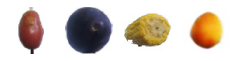

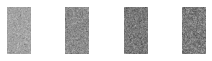

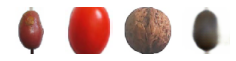

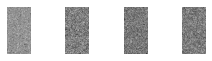

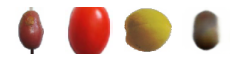

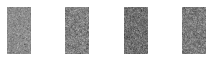

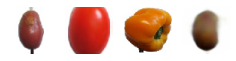

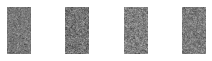

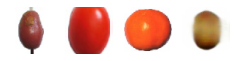

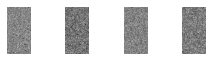

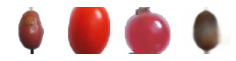

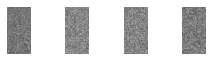

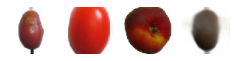

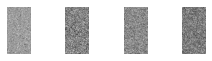

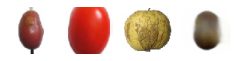

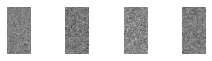

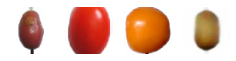

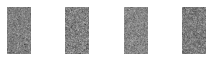

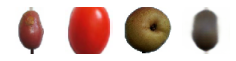

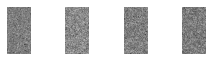

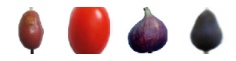

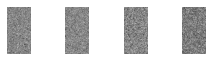

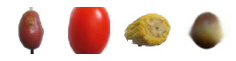

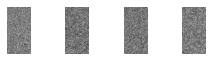

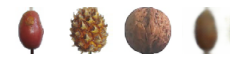

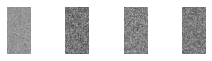

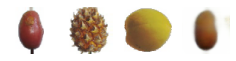

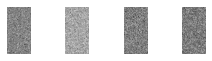

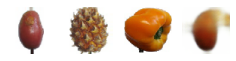

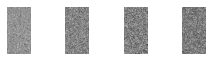

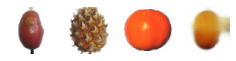

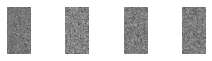

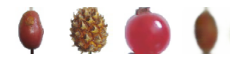

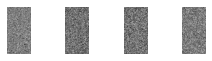

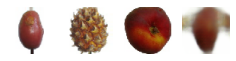

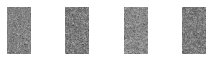

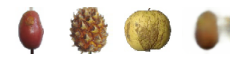

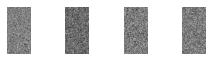

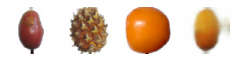

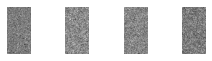

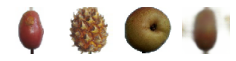

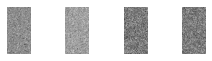

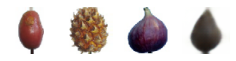

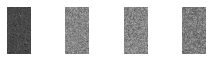

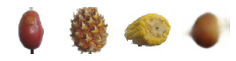

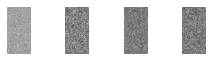

In [ ]:
plt.clf()

print('     A     -    B     +   C     = ?')

x_test = train_generator_cnn.next()

x_test2 = train_generator_cnn.next()

x_test3 = validation_generator_cnn.next()

counting = 0

j = 0
for bimage in x_test2:
  
  j = j + 1
  i = 0
  for cimage in x_test3:

    i = i + 1

    
    plt.figure(figsize=(4, 4))
    plt.subplot(4 , 4 , 1)
    plt.axis('off')
    plt.imshow(x_test[0])


#    plt.figure(figsize=(4, 4))
    plt.subplot(4 , 4 , 2)
    plt.axis('off')
    plt.imshow(x_test2[j])

#    plt.figure(figsize=(4, 4))
    plt.subplot(4 , 4 , 3)
    plt.axis('off')
    plt.imshow(x_test3[i])


    thislatentvector1 = encoder.predict(x_test[0:1])[2]
    thislatentvector2 = encoder.predict(x_test2[j:j+1])[2]
    thislatentvector3 = encoder.predict(x_test3[i:i+1])[2]



    x_decoded = decoder.predict( [thislatentvector1 - thislatentvector2 + thislatentvector3 ] )
    digit = x_decoded[0].reshape(image_size, image_size, 3)

#    plt.figure(figsize=(4, 4))
    plt.subplot(4 , 4 , 4)
    plt.axis('off')
    plt.imshow(digit)
    plt.show()


   # print('    ' + str(imagenumber1) + '  -  ' + str(imagenumber2)  + ' =    ?    ')



    plt.figure(figsize=(4, 4))
    plt.subplot(4 , 4 , 1)
    plt.axis('off')
    plt.imshow(thislatentvector1.reshape(80, latent_dim_colums))

    plt.subplot(4 , 4 , 2)
    plt.axis('off')
    plt.imshow(thislatentvector2.reshape(80, latent_dim_colums))

    plt.subplot(4 , 4 , 3)
    plt.axis('off')
    plt.imshow(thislatentvector3.reshape(80, latent_dim_colums))

    plt.subplot(4 , 4 , 4)
    plt.axis('off')
    plt.imshow(nandJ.reshape(80, latent_dim_colums))


    plt.show()
    
    if i > 10: 
      break
  if j > 3:
    break

